In [3]:
# Importing Libraries
import argparse
import numpy as np
import gym
import matplotlib.pyplot as plt

In [4]:
# Define command-line arguments
# parser = argparse.ArgumentParser()
# parser.add_argument('--lr', type=float, default=0.8, help='learning rate')
# parser.add_argument('--gemma', type=float, default=0.95, help='discount factor')
# parser.add_argument('--num_episodes', type=int, default=10000, help='number of episodes')
# args = parser.parse_args()

usage: ipykernel_launcher.py [-h] [--lr LR] [--gemma GEMMA]
                             [--num_episodes NUM_EPISODES]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"3631f43d-a837-43fc-baed-53313cfd9acf" --shell=9002 --transport="tcp" --iopub=9004 --f=c:\Users\fayss\AppData\Roaming\jupyter\runtime\kernel-v2-21684Hpk1ddxCTh7M.json


SystemExit: 2

c:\Users\fayss\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
# Set the learning rate, discount factor, and number of episodes
lr = 0.8
gemma = 0.95
num_episodes = 10000

In [7]:
# Create the environment
env = gym.make('FrozenLake-v1')

In [8]:
# Initialize the Q-table
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [12]:
# lists to store performance metrics
total_rewards = []
total_steps = []
success_rate = []
test_reward = []

In [13]:
# Run the Q-learning algorithm
for i in range(num_episodes):
    s = env.reset()
    done = False
    episode_reward = 0
    num_steps = 0
    
    # The Q-Table learning algorithm
    while not done:
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        s_, r, done, _ = env.step(a)
        
        # update Q values
        Q[s,a] = Q[s,a] + lr*(r + num_episodes*np.max(Q[s_,:]) - Q[s,a])
        s = s_
        episode_reward += r
        num_steps += 1
    
    # append performance metrics to lists
    total_rewards.append(episode_reward/num_steps)
    total_steps.append(num_steps)
    success_rate.append(int(episode_reward > 0))

    # Print episode metrics
    print("Episode:", i+1, "Reward:", episode_reward, "Steps:", num_steps)

Episode: 1 Reward: 0.0 Steps: 3
Episode: 2 Reward: 0.0 Steps: 4
Episode: 3 Reward: 0.0 Steps: 2
Episode: 4 Reward: 0.0 Steps: 8
Episode: 5 Reward: 0.0 Steps: 12
Episode: 6 Reward: 1.0 Steps: 14
Episode: 7 Reward: 0.0 Steps: 8
Episode: 8 Reward: 0.0 Steps: 11
Episode: 9 Reward: 0.0 Steps: 5
Episode: 10 Reward: 0.0 Steps: 4
Episode: 11 Reward: 0.0 Steps: 2
Episode: 12 Reward: 1.0 Steps: 9
Episode: 13 Reward: 0.0 Steps: 2
Episode: 14 Reward: 0.0 Steps: 2
Episode: 15 Reward: 0.0 Steps: 4
Episode: 16 Reward: 1.0 Steps: 7
Episode: 17 Reward: 0.0 Steps: 2
Episode: 18 Reward: 0.0 Steps: 3
Episode: 19 Reward: 0.0 Steps: 6
Episode: 20 Reward: 0.0 Steps: 21
Episode: 21 Reward: 0.0 Steps: 2
Episode: 22 Reward: 0.0 Steps: 9
Episode: 23 Reward: 0.0 Steps: 11
Episode: 24 Reward: 0.0 Steps: 6
Episode: 25 Reward: 0.0 Steps: 3
Episode: 26 Reward: 0.0 Steps: 2
Episode: 27 Reward: 0.0 Steps: 8
Episode: 28 Reward: 0.0 Steps: 4
Episode: 29 Reward: 0.0 Steps: 5
Episode: 30 Reward: 0.0 Steps: 5
Episode: 31 Re

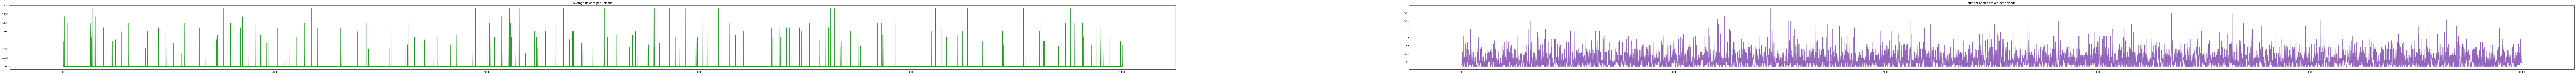

In [14]:
# Plotting the averge rewards and episode Lengths gained throughout each episode per episode
fig, axs = plt.subplots(1, 2, figsize=(200, 5))
axs[0].plot(total_rewards, 'tab:green')
axs[0].set_title('Average Reward per Episode')
axs[1].plot(total_steps, 'tab:purple')
axs[1].set_title('number of steps taken per episode')

plt.show()

In [15]:
# Print overall metrics
print('----------------------------------------------------------')
print("Overall Average reward:", np.mean(total_rewards))
print("Overall Average number of steps:", np.mean(total_steps))
print("Success rate (%):", np.mean(success_rate)*100)

----------------------------------------------------------
Overall Average reward: 0.002465119322026443
Overall Average number of steps: 6.2481
Success rate (%): 2.45
